# Data Preparation for  Workshop
 >__Created__:  2018 Harrison B. Prosper


In [2]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

from skutil import bootstrap_unweight
%matplotlib inline

In [3]:
# update fonts
FONTSIZE = 32
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 28}

mp.rc('font', **font)

### Read data into memory
  * Read data sets into memory
  * Add a target column to each dataframe for later use. 

In [5]:
sig = pd.read_csv('datasets/hzz_bkg.csv')
sig['target'] = np.ones(len(sig))

bkg = pd.read_csv('datasets/zz.csv')
bkg['target'] = np.zeros(len(bkg))
names = sig.keys()

### Split into testing and training data samples

In [6]:
test_fraction = 0.20
sig_train_data, sig_test_data = train_test_split(sig, test_size=test_fraction)
bkg_train_data, bkg_test_data = train_test_split(bkg, test_size=test_fraction)

print "sig data"
print sig_train_data.shape, sig_test_data.shape
print

print "bkg data"
print bkg_train_data.shape, bkg_test_data.shape


sig data
(46416, 10) (11604, 10)

bkg data
(39770, 10) (9943, 10)


### Unweight data
  * Use a bootstrap technique to unweight data.

In [7]:
sig_train = bootstrap_unweight(sig_train_data)
sig_test  = bootstrap_unweight(sig_test_data)
print sig_train.shape, sig_test_data.shape

bkg_train = bootstrap_unweight(bkg_train_data)
bkg_test  = bootstrap_unweight(bkg_test_data)
print bkg_train.shape, bkg_test.shape

summed weight sum:     0.0276
summed weight sum:     0.0069
(45369, 10) (11604, 10)
summed weight sum:     0.0140
summed weight sum:     0.0035
(38808, 10) (9702, 10)


### Plot training data

In [29]:
def plotData(sig, bkg, xmin=0, xmax=140, ymin=0, ymax=140, ftsize=FONTSIZE):
    # set size of figure
    plt.figure(figsize=(10,8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$m_{Z1}$ (GeV)', fontsize=ftsize)
    plt.ylabel(r'$m_{Z2}$ (GeV)', fontsize=ftsize)
    
    # choose color of points
    red = (1,0,0)
    blue= (0,0,1)
    plt.scatter(sig['Z1mass'], sig['Z2mass'], marker='o',
                s=50, c=blue, alpha=0.2, label=r'$H \rightarrow ZZ \rightarrow 4\ell$')
    pl.legend(loc='upper left', fontsize='small') # activate legend
    
    plt.scatter(bkg['Z1mass'], bkg['Z2mass'], marker='*',
                s=100, c=red,  alpha=0.2, label=r'$ZZ \rightarrow 4\ell$')
    pl.legend(loc='upper left', fontsize='small') # activate legend
    
    plt.savefig('fig_Z1mass_Z2mass.png')
    plt.show()

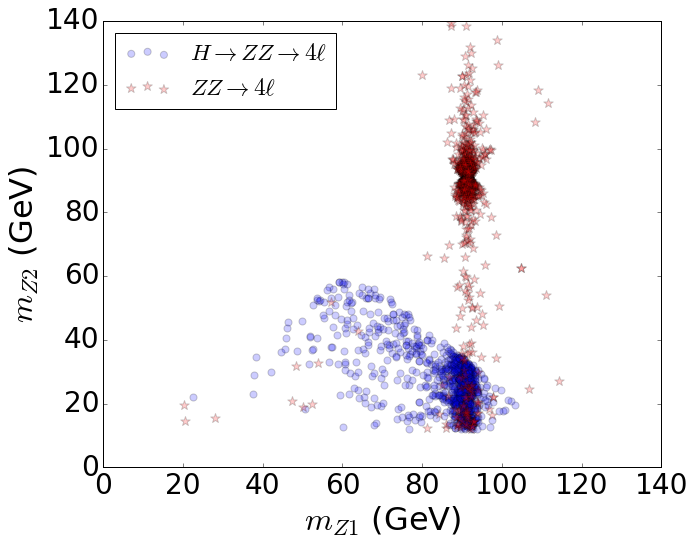

In [31]:
N = 1000
plotData(sig_train[:N], bkg_train[:N])

### Prepare data for training/testing and save to file
  * Concatenate training sig and bkg data, randomly shuffle rows
  * Extract two columns for inputs $X$ and targets for $y$ for both training and test data
  * Save training and test data using joblib

In [32]:
# create a randomly shuffled array of indices of size 2*N for training data
N = 25000
index = np.random.permutation(2*N)

# use the iloc method to randomly shuffle the ordinal values of the rows
train_data = pd.concat([sig_train[:N], bkg_train[:N]]).iloc[index]
print train_data.shape

# create a randomly shuffled array of indices of size 2*N for test data
N = 5000
index = np.random.permutation(2*N)
test_data = pd.concat([sig_test[:N], bkg_test[:N]]).iloc[index]
print test_data.shape

# extract (Z1mass, Z2mass) for training
X_train = pd.DataFrame({'Z1mass': [], 
                        'Z2mass': []})
X_train['Z1mass'] = train_data['Z1mass']
X_train['Z2mass'] = train_data['Z2mass']

# ... and for testing
X_test  = pd.DataFrame({'Z1mass': [], 
                        'Z2mass': []})
X_test['Z1mass'] = test_data['Z1mass']
X_test['Z2mass'] = test_data['Z2mass']
print X_test.shape

# extract y data
y_train = train_data['target']
y_test  = test_data['target']

# save data to file
filename = 'higgs_data.pkl'
joblib.dump([train_data, test_data], filename)

(50000, 10)
(10000, 10)
(10000, 2)


['higgs_data.pkl']